In [ ]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:03<00:00, 296MB/s]
100% 812M/812M [00:03<00:00, 229MB/s]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)), # Explicit Input Layer
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5), # Dropout for regularization
    layers.Dense(2, activation="softmax") # Output layer (2 classes)
])


In [ ]:
# Compile the Model
model.compile(
optimizer="adam",
loss="categorical_crossentropy",
metrics=["accuracy"]
)

In [ ]:
# Display Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,142,210 (4.36 MB)

 Trainable params: 1,142,210 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# unzip dataset
import zipfile
import glob
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
if not os.path.exists('dogs-vs-cats.zip'):
    print("Error: dogs-vs-cats.zip not found!")
else:
    print("Found dogs-vs-cats.zip")

Found dogs-vs-cats.zip


In [ ]:
print("\nExtracting files...")
with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
  zip_ref.extractall('dataset')

print("Extracting train.zip...")
with zipfile.ZipFile('dataset/train.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset/train')



Extracting files...
Extracting train.zip...


In [ ]:
def load_preprocess_images(image_path, size=(32,32)):
  img = load_img(image_path, target_size=size)
  img_array = img_to_array(img)
  new_img_array = img_array / 255.0 # normalize pixel values return new_img_array

In [ ]:
# grab images
train_directory = 'dataset/train/train'
img_paths = glob.glob(os.path.join(train_directory, '*.jpg'))

# list to store images and labels
X = []
y = []

In [ ]:
for i, img_path in enumerate(img_paths):
    if i % 1000 == 0:  # Print progress every 1000 images
        print(f"Processing image {i}/{len(img_paths)}")

    try:
        # Get image label from filename
        label = 1 if 'dog' in os.path.basename(img_path).lower() else 0

        # Load and preprocess image
        img = load_img(img_path, target_size=(32, 32))
        img_array = img_to_array(img)
        img_array = img_array / 255.0

        # Append to lists
        X.append(img_array)
        y.append(label)

    except Exception as e:
        print(f"Error processing {img_path}: {str(e)}")

Processing image 0/25000
Processing image 1000/25000
Processing image 2000/25000
Processing image 3000/25000
Processing image 4000/25000
Processing image 5000/25000
Processing image 6000/25000
Processing image 7000/25000
Processing image 8000/25000
Processing image 9000/25000
Processing image 10000/25000
Processing image 11000/25000
Processing image 12000/25000
Processing image 13000/25000
Processing image 14000/25000
Processing image 15000/25000
Processing image 16000/25000
Processing image 17000/25000
Processing image 18000/25000
Processing image 19000/25000
Processing image 20000/25000
Processing image 21000/25000
Processing image 22000/25000
Processing image 23000/25000
Processing image 24000/25000


In [ ]:
X_train = np.array(X)
y_train = np.array(y)
y_train = keras.utils.to_categorical(y_train, 2)

print("\nFinal dataset shapes:")
print("X shape:", X_train.shape)
print("y shape:", y_train.shape)



Final dataset shapes:
X shape: (25000, 32, 32, 3)
y shape: (25000, 2)


In [ ]:
train = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    # callbacks=[early_stopping, checkpoint]
)

# Evaluate on Test Data
loss, acc = model.evaluate(X_train, y_train, verbose=2)
print(f"\nTrain Accuracy: {acc * 100:.2f}%")
print(f"Train Loss: {loss * 100:.2f}%")

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8453 - loss: 0.3512 - val_accuracy: 0.8098 - val_loss: 0.4234
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8667 - loss: 0.3096 - val_accuracy: 0.8018 - val_loss: 0.4843
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8853 - loss: 0.2728 - val_accuracy: 0.8112 - val_loss: 0.4419
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9077 - loss: 0.2228 - val_accuracy: 0.8122 - val_loss: 0.4800
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9216 - loss: 0.1877 - val_accuracy: 0.8038 - val_loss: 0.5521
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9369 - loss: 0.1542 - val_accuracy: 0.8046 - val_loss: 0.5609
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9511 - loss: 0.1195 - val_accuracy: 0.8060 - val_loss: 0.6498
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9549 - loss: 0.1151 - val_accuracy: 0.

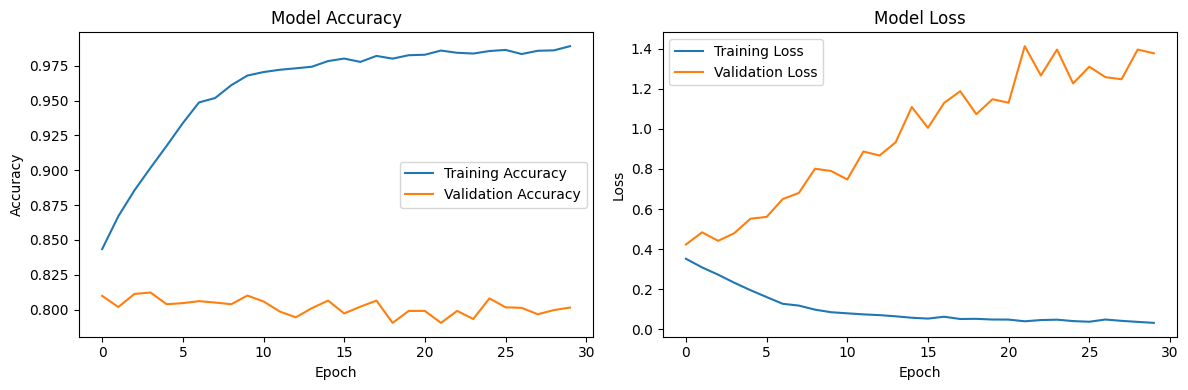

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Training Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Training Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# DATA AUGMENTATION LAYER
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.01),
    layers.RandomZoom(0.01),
    layers.RandomBrightness(0.01),
    layers.RandomContrast(0.01)
])

improved_model = keras.Sequential([
    # data augmentation layer
    keras.Input(shape=(32,32,3)),
    # data_augmentation,

    # # first block on conv
    # layers.Conv2D(64, (3, 3), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    # layers.BatchNormalization(),
    # layers.Activation("relu"),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.25),

    # # second block on conv
    # layers.Conv2D(128, (3, 3), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    # layers.BatchNormalization(),
    # layers.Activation("relu"),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.25),

    # # third block on conv
    # layers.Conv2D(256, (3, 3), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    # layers.BatchNormalization(),
    # layers.Activation("relu"),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.25),

    # # dense layers
    # layers.Flatten(),
    # layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01)),
    # layers.BatchNormalization(),
    # layers.Activation("relu"),
    # layers.Dropout(0.5),
    data_augmentation,

    layers.Conv2D(64, (3,3), activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3,3), activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5), # Dropout for regularization

    # output
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
y_train = np.argmax(y_train, axis=1)  # Convert from [1,0] / [0,1] to 0 / 1
print(y_train)
print(y_train.shape)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:

improved_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)



In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    ),
]

In [ ]:
new_train = improved_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5686 - loss: 0.9731 - val_accuracy: 0.6644 - val_loss: 0.8908 - learning_rate: 1.0000e-04
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5819 - loss: 0.9385 - val_accuracy: 0.6608 - val_loss: 0.8605 - learning_rate: 1.0000e-04
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5951 - loss: 0.8959 - val_accuracy: 0.6972 - val_loss: 0.8062 - learning_rate: 1.0000e-04
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6014 - loss: 0.8600 - val_accuracy: 0.7216 - val_loss: 0.7582 - learning_rate: 1.0000e-04
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6079 - loss: 0.8295 - val_accuracy: 0.7002 - val_loss: 0.7445 - learning_rate: 1.0000e-04
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6224 - loss: 0.7983 - val_accuracy: 0.7268 - val_loss: 0.7010 - learning_rate: 1.0000e-04
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - a

In [ ]:
# Evaluate on Test Data
loss, acc = improved_model.evaluate(X_train, y_train, verbose=2)
print(f"\nTrain Accuracy: {acc * 100:.2f}%")
print(f"Train Loss: {loss * 100:.2f}%")

782/782 - 3s - 3ms/step - accuracy: 0.8203 - loss: 0.4447

Train Accuracy: 82.03%
Train Loss: 44.47%


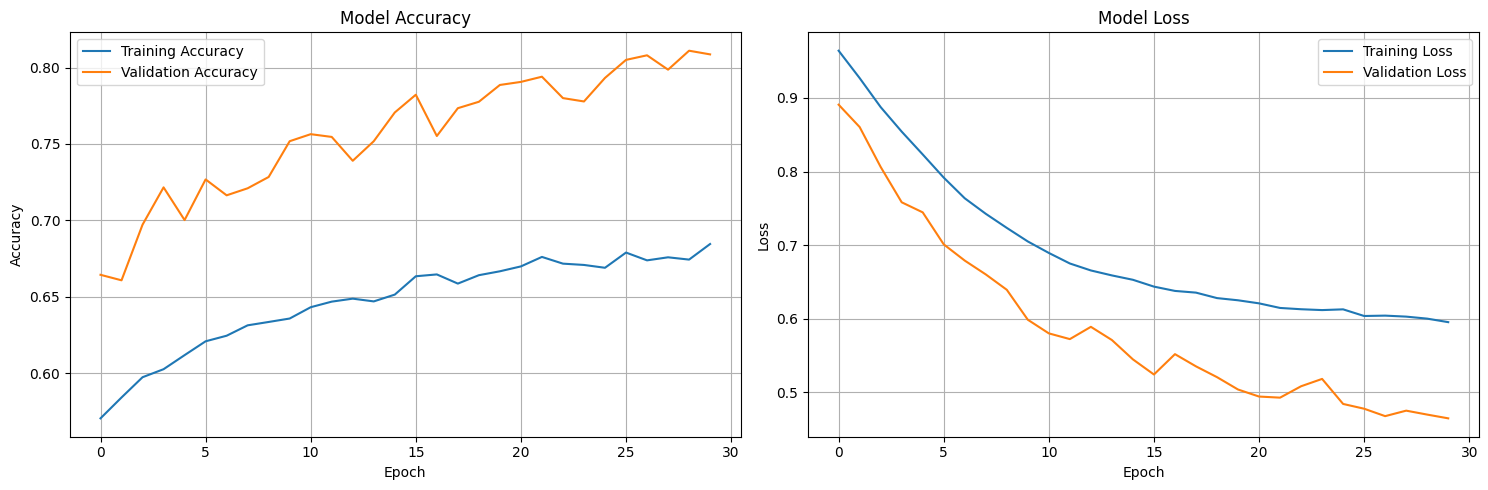

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(new_train.history['accuracy'], label='Training Accuracy')
ax1.plot(new_train.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot loss
ax2.plot(new_train.history['loss'], label='Training Loss')
ax2.plot(new_train.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()